<a href="https://colab.research.google.com/github/GloomilySal/PColab/blob/main/dataVentasTextiles_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importando librerías**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataVentas= pd.read_csv('/content/drive/MyDrive/Grupal_ML2021-1/DATASET_VENTAS/dataVentasTextiles_ok.csv')

##**Conociendo la data**

**Mostrando Información de los datos**

In [ ]:
dataVentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Orden            63221 non-null  int64  
 1   Fecha            63221 non-null  object 
 2   Medio            63221 non-null  object 
 3   Vendedor         63221 non-null  object 
 4   Plataforma       63221 non-null  object 
 5   Comisión         63221 non-null  float64
 6   Tipo Orden       63221 non-null  object 
 7   Tipo de Cliente  63221 non-null  object 
 8   Sexo             63221 non-null  object 
 9   Categoría        63221 non-null  object 
 10  Producto         63221 non-null  object 
 11  Item             63221 non-null  object 
 12  Precio           63221 non-null  int64  
 13  NFrec_Devol_V    63221 non-null  float64
 14  NFrec_Devol_P    63221 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 7.2+ MB


In [ ]:
dataVentas.describe()

,Orden,Comisión,Precio,NFrec_Devol_V,NFrec_Devol_P
count,63221.000000,63221.000000,63221.000000,63221.000000,63221.000000
mean,3738.557615,0.127263,40.680312,0.113129,0.098823
std,2164.244875,0.146989,13.574989,0.148607,0.014654
min,1.000000,0.000000,10.000000,0.000000,0.050000
25%,1882.000000,0.000000,34.000000,0.050000,0.090000
50%,3738.000000,0.000000,40.000000,0.060000,0.100000
75%,5610.000000,0.300000,50.000000,0.120000,0.110000
max,7500.000000,0.400000,100.000000,0.630000,0.160000


**Mostrando datos aleatorios**

In [ ]:
dataVentas.sample(6)

,Orden,Fecha,Medio,Vendedor,Plataforma,Comisión,Tipo Orden,Tipo de Cliente,Sexo,Categoría,Producto,Item,Precio,NFrec_Devol_V,NFrec_Devol_P
26833,3157,18/12/2020,Propio,Directo en Tienda,Website,0.0,Compra,Habitual,Mujeres,Leggings,Leggings Dreamy,Bottoms,50,0.02,0.10
38430,4545,06/03/2020,Propio,Publicidad Insta,Instagram,0.0,Compra,Habitual,Mujeres,Camisetas y Tops,Camiseta Carbon mesh,Tops,34,0.06,0.08
57259,6781,30/12/2020,Influencer,aleixploreuria,Youtube,0.2,Compra,Nuevo,Mujeres,Chamarras,Chamarra Windbreaker,Tops,48,0.06,0.09
24621,2905,24/01/2020,Propio,Publicidad Insta,Instagram,0.0,Compra,Habitual,Hombre,Interior,Leggings Flex,Interior,50,0.06,0.08
22312,2631,28/10/2020,Propio,Publicidad Youtube,Youtube,0.0,Compra,Habitual,Hombre,Pantalones,Pants de Entrenamiento Reactivo,Bottoms,40,0.05,0.10
50670,5984,15/02/2020,Propio,Publicidad Face,Facebook,0.0,Compra,Nuevo,Hombre,Calcetines,calcetines Delgados,Interior,10,0.07,0.10


**Mostrando las 5 primeras filas de registros**


In [ ]:
dataVentas.head()

,Orden,Fecha,Medio,Vendedor,Plataforma,Comisión,Tipo Orden,Tipo de Cliente,Sexo,Categoría,Producto,Item,Precio,NFrec_Devol_V,NFrec_Devol_P
0,1,05/08/2020,Propio,Directo en Tienda,Website,0.0,Compra,Habitual,Hombre,Pantalones,Pants de Entrenamiento Reactivo,Bottoms,40,0.02,0.10
1,1,05/08/2020,Propio,Directo en Tienda,Website,0.0,Compra,Habitual,Hombre,Sudaderas,Sudadera sin Costuras,Tops,50,0.02,0.12
2,1,05/08/2020,Propio,Directo en Tienda,Website,0.0,Compra,Habitual,Mujeres,Leggings,Leggings Ombre,Bottoms,36,0.02,0.09
3,1,05/08/2020,Propio,Directo en Tienda,Website,0.0,Compra,Habitual,Mujeres,Bra deportivo,Bra Vital sin costuras,Interior,40,0.02,0.12
4,1,05/08/2020,Propio,Directo en Tienda,Website,0.0,Compra,Habitual,Hombre,Camisetas,Camiseta Heather,Tops,50,0.02,0.10


**Mostrando las 5 últimas filas de registros**

In [ ]:
dataVentas.tail()

,Orden,Fecha,Medio,Vendedor,Plataforma,Comisión,Tipo Orden,Tipo de Cliente,Sexo,Categoría,Producto,Item,Precio,NFrec_Devol_V,NFrec_Devol_P
63216,7500,15/03/2020,Influencer,gypseajain,Youtube,0.3,Compra,Habitual,Mujeres,Chamarras,Sudadera Cross back,Tops,46,0.0,0.12
63217,7500,15/03/2020,Influencer,gypseajain,Youtube,0.3,Compra,Habitual,Mujeres,Bra deportivo,Bra sin costuras,Interior,38,0.0,0.10
63218,7500,15/03/2020,Influencer,gypseajain,Youtube,0.3,Compra,Habitual,Hombre,Camisetas,Camiseta Living Manga Larga,Tops,40,0.0,0.10
63219,7500,15/03/2020,Influencer,gypseajain,Youtube,0.3,Compra,Habitual,Mujeres,Ropa Interior,Calzones Deportivos sin costuras,Interior,20,0.0,0.10
63220,7500,15/03/2020,Influencer,gypseajain,Youtube,0.3,Compra,Habitual,Mujeres,Chamarras,Chamarra impermeable para correr,Tops,100,0.0,0.10


**El método UNIQUE nos permite revisar datos únicos**

In [ ]:
dataVentas['Plataforma'].unique()

array(['Website', 'Facebook', 'Instagram', 'Youtube'], dtype=object)

In [ ]:
dataVentas['Tipo Orden'].unique()

array(['Compra', 'Devolucion'], dtype=object)

In [ ]:
dataVentas['Tipo de Cliente'].unique()

array(['Habitual', 'Nuevo'], dtype=object)

In [ ]:
dataVentas['Categoría'].unique()

array(['Pantalones', 'Sudaderas', 'Leggings', 'Bra deportivo',
       'Camisetas', 'Chamarras', 'Interior', 'Ropa Interior',
       'Camisetas y Tops', 'Shorts', 'Calcetines'], dtype=object)

In [ ]:
dataVentas['Item'].unique()

array(['Bottoms', 'Tops', 'Interior'], dtype=object)

**El método "shape" me permite mostrar la cantidad de Atributos**

In [ ]:
dataVentas.shape

(63221, 15)

**Muestro el tamaño del dataset**

In [ ]:
dataVentas.size

948315

##**Exploración de Datos**

In [ ]:
# Contar los registros por una columna específica
dataVentas['Plataforma'].value_counts()

Instagram    33903
Youtube      11061
Facebook      9725
Website       8532
Name: Plataforma, dtype: int64

In [ ]:
dataVentas['Plataforma'].value_counts().sort_index(ascending = True)

Facebook      9725
Instagram    33903
Website       8532
Youtube      11061
Name: Plataforma, dtype: int64

In [ ]:
# Contar los registros por una columna específica
dataVentas['Categoría'].value_counts()

Pantalones          8067
Leggings            7772
Chamarras           7445
Interior            7233
Sudaderas           7010
Camisetas y Tops    6412
Bra deportivo       5885
Camisetas           4374
Shorts              3656
Ropa Interior       3127
Calcetines          2240
Name: Categoría, dtype: int64

In [ ]:
dataVentas['Categoría'].value_counts().sort_index(ascending = True)

Bra deportivo       5885
Calcetines          2240
Camisetas           4374
Camisetas y Tops    6412
Chamarras           7445
Interior            7233
Leggings            7772
Pantalones          8067
Ropa Interior       3127
Shorts              3656
Sudaderas           7010
Name: Categoría, dtype: int64

In [ ]:
dataVentas['Tipo Orden'].value_counts().sort_index(ascending = True)

Compra        57540
Devolucion     5681
Name: Tipo Orden, dtype: int64

In [ ]:
dataVentas[['Plataforma','Tipo Orden']].value_counts()

Plataforma  Tipo Orden
Instagram   Compra        29734
Youtube     Compra        10508
Facebook    Compra         8955
Website     Compra         8343
Instagram   Devolucion     4169
Facebook    Devolucion      770
Youtube     Devolucion      553
Website     Devolucion      189
dtype: int64

##**Realizando Gráficos circulares y de barras**

**Gráfico circular o de pastel según la plataforma utilizada para las ventas**

In [ ]:
plataformalabels = ['Facebook', 'Instagram', 'Website','Youtube']
size = [9725, 33903, 8532, 11061]
explode = [0, 0, 0, 0]

El método legend me permite agregar una legenda y especificar su localización (loc = above, down, left, right, center, best (la posición mejor)).

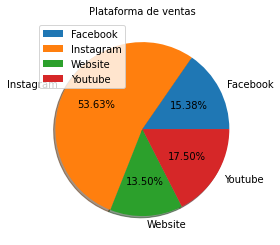

In [ ]:
plt.pie(size, labels = plataformalabels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Plataforma de ventas', fontsize = 10)
plt.axis('off')
plt.legend(loc = 'best')
plt.show()

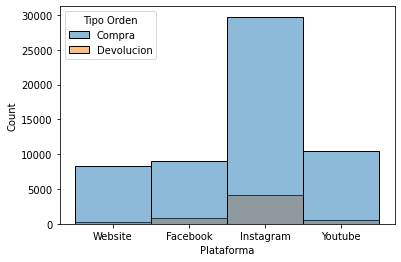

In [ ]:
sns.histplot(dataVentas, x = 'Plataforma', hue='Tipo Orden')

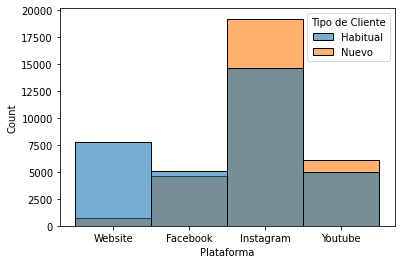

In [ ]:
sns.histplot(dataVentas, x = 'Plataforma', hue='Tipo de Cliente', alpha=0.60)

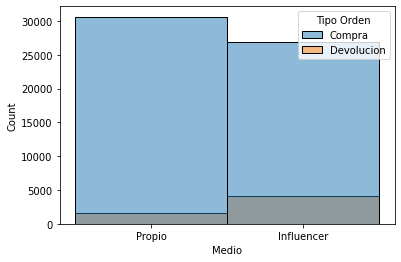

In [ ]:
sns.histplot(dataVentas, x = 'Medio', hue='Tipo Orden', alpha=0.50)

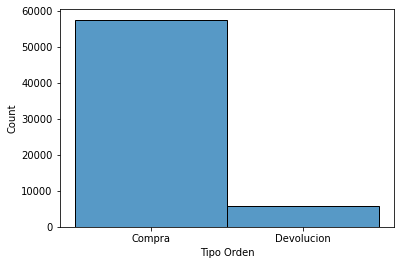

In [ ]:
sns.histplot(dataVentas, x = 'Tipo Orden')

**Gráfico de barras según la categoría del producto**

Text(0.5, 1.0, 'Registros según Categoría')

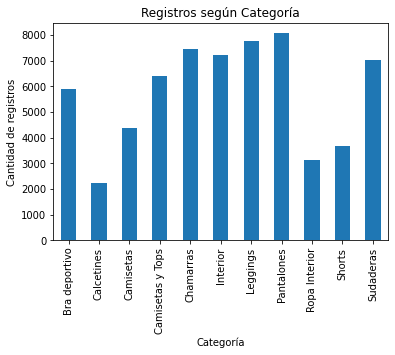

In [ ]:
categoria.plot(kind = 'bar')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de registros')
plt.title('Registros según Categoría')

##**Limpieza del DataSet**

**Mostrando las columnas del dataset**

In [ ]:
dataVentas.columns

Index(['Orden', 'Fecha', 'Medio', 'Vendedor', 'Plataforma', 'Comisión',
       'Tipo Orden', 'Tipo de Cliente', 'Sexo', 'Categoría', 'Producto',
       'Item', 'Precio', 'NFrec_Devol_V', 'NFrec_Devol_P'],
      dtype='object')

**Descartando columnas no relevantes del DataSet**

In [ ]:
dataVentas1 = dataVentas.drop(columns=['Orden','Fecha','Producto','Categoría','Vendedor','Sexo'])

In [ ]:
dataVentas1

,Medio,Plataforma,Comisión,Tipo Orden,Tipo de Cliente,Item,Precio,NFrec_Devol_V,NFrec_Devol_P
0,Propio,Website,0.0,Compra,Habitual,Bottoms,40,0.02,0.10
1,Propio,Website,0.0,Compra,Habitual,Tops,50,0.02,0.12
2,Propio,Website,0.0,Compra,Habitual,Bottoms,36,0.02,0.09
3,Propio,Website,0.0,Compra,Habitual,Interior,40,0.02,0.12
4,Propio,Website,0.0,Compra,Habitual,Tops,50,0.02,0.10
...,...,...,...,...,...,...,...,...,...
63216,Influencer,Youtube,0.3,Compra,Habitual,Tops,46,0.00,0.12
63217,Influencer,Youtube,0.3,Compra,Habitual,Interior,38,0.00,0.10
63218,Influencer,Youtube,0.3,Compra,Habitual,Tops,40,0.00,0.10
63219,Influencer,Youtube,0.3,Compra,Habitual,Interior,20,0.00,0.10


In [ ]:
dataVentas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Medio            63221 non-null  object 
 1   Plataforma       63221 non-null  object 
 2   Comisión         63221 non-null  float64
 3   Tipo Orden       63221 non-null  object 
 4   Tipo de Cliente  63221 non-null  object 
 5   Item             63221 non-null  object 
 6   Precio           63221 non-null  int64  
 7   NFrec_Devol_V    63221 non-null  float64
 8   NFrec_Devol_P    63221 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.3+ MB


##**Clasificando la frecuencia de Devolución por Producto**

En esta sección estamos clasificando los valores de frecuencia de devolución de los productos.

**Agregando columna nueva Frec_Devol_P**

In [ ]:
#De mayor a menor
def CondFrec(valor):
    valor = float(valor.NFrec_Devol_P)
    if valor == 0:
        return 'Nunca'
    elif 0.01 <= valor <= 0.25:
        return 'Rara vez'
    elif 0.26 <= valor <= 0.50:
        return 'A menudo'
    elif 0.51 <= valor <= 0.75:
        return 'Usualmente'
    elif 0.76 <= valor <= 1:
        return 'Siempre'
    else:
        return 'Error'

In [ ]:
#Renombrando dataVentas a df
df = pd.DataFrame(dataVentas1)
df['Frec_Devol_P'] = df.apply(CondFrec, axis=1)

In [ ]:
df.sample(10)

,Medio,Plataforma,Comisión,Tipo Orden,Tipo de Cliente,Item,Precio,NFrec_Devol_V,NFrec_Devol_P,Frec_Devol_P
30080,Propio,Instagram,0.0,Compra,Habitual,Tops,28,0.06,0.09,Rara vez
37221,Propio,Website,0.0,Compra,Habitual,Bottoms,26,0.02,0.11,Rara vez
14861,Propio,Website,0.0,Compra,Habitual,Tops,28,0.02,0.09,Rara vez
3876,Influencer,Instagram,0.3,Compra,Habitual,Tops,48,0.02,0.09,Rara vez
16683,Influencer,Facebook,0.3,Compra,Nuevo,Tops,28,0.18,0.10,Rara vez
4603,Propio,Website,0.0,Compra,Habitual,Tops,46,0.02,0.12,Rara vez
15042,Influencer,Youtube,0.2,Compra,Habitual,Bottoms,40,0.05,0.07,Rara vez
52592,Influencer,Youtube,0.3,Compra,Habitual,Interior,40,0.01,0.12,Rara vez
20378,Influencer,Youtube,0.2,Compra,Habitual,Tops,42,0.05,0.10,Rara vez
41061,Propio,Website,0.0,Compra,Habitual,Interior,15,0.02,0.09,Rara vez


In [ ]:
df['Frec_Devol_P'].unique()

array(['Rara vez'], dtype=object)

In [ ]:
dataVentas2 = df.drop(columns=['Frec_Devol_P','NFrec_Devol_P'])

In [ ]:
dataVentas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Medio            63221 non-null  object 
 1   Plataforma       63221 non-null  object 
 2   Comisión         63221 non-null  float64
 3   Tipo Orden       63221 non-null  object 
 4   Tipo de Cliente  63221 non-null  object 
 5   Item             63221 non-null  object 
 6   Precio           63221 non-null  int64  
 7   NFrec_Devol_V    63221 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.9+ MB


**Debido a que los valores de la nueva columna: "Frec_Devol_P" se encuentra en el intervalo "Rara vez": [0.01; 0.25], consideramos que la frecuencia devolución por producto no es significativa para el trabajo.** 

##**Clasificando la frecuencia de Devolución por Vendedor**

En esta sección estamos clasificando los valores de frecuencia de devolución por vendedor.

In [ ]:
#De mayor a menor
def CondFrecV(valor):
    valor = float(valor.NFrec_Devol_V)
    if valor == 0:
        #Nunca
        return 0
    elif 0.01 <= valor <= 0.25:
        #Rara vez
        return 1
    elif 0.26 <= valor <= 0.50:
        #A menudo
        return 2
    elif 0.51 <= valor <= 0.75:
        #Usualmente
        return 3
    elif 0.76 <= valor <= 1:
        #Casi Siempre
        return 4
    else:
        return 5


In [ ]:
#Renombrando dataVentas a df
dff = pd.DataFrame(dataVentas2)
dff['Frec_Devol_V'] = dataVentas2.apply(CondFrecV, axis=1)

In [ ]:
# Eliminamos la columna del num de frecuencias
dff2 = dff.drop(columns=['NFrec_Devol_V'])

In [ ]:
dff2.sample(10)

,Medio,Plataforma,Comisión,Tipo Orden,Tipo de Cliente,Item,Precio,Frec_Devol_V
14685,Influencer,Youtube,0.1,Compra,Nuevo,Interior,35,1
19225,Influencer,Instagram,0.3,Compra,Nuevo,Tops,30,1
32446,Influencer,Instagram,0.4,Devolucion,Habitual,Tops,45,3
1435,Propio,Instagram,0.0,Compra,Nuevo,Interior,20,1
60725,Propio,Facebook,0.0,Compra,Nuevo,Bottoms,50,1
33220,Propio,Instagram,0.0,Compra,Nuevo,Bottoms,40,1
5333,Influencer,Facebook,0.3,Compra,Nuevo,Tops,45,1
5083,Influencer,Instagram,0.4,Compra,Nuevo,Tops,50,3
27029,Propio,Instagram,0.0,Compra,Habitual,Interior,50,1
12179,Influencer,Facebook,0.3,Compra,Habitual,Tops,48,1


In [ ]:
dff2['Frec_Devol_V'].unique()

array([1, 3, 0, 2])

In [ ]:
graf_DevolV = dff2['Frec_Devol_V'].value_counts()
graf_DevolV

1    55129
3     5182
0     2339
2      571
Name: Frec_Devol_V, dtype: int64

Text(0.5, 1.0, 'Frecuencia de Devoluciones por Vendedor')

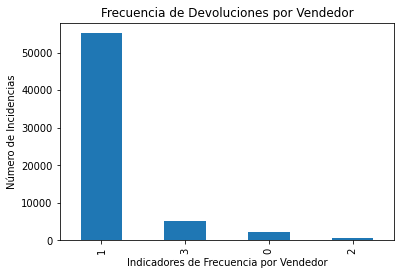

In [ ]:
graf_DevolV.plot(kind = 'bar')
plt.xlabel('Indicadores de Frecuencia por Vendedor')
plt.ylabel('Número de Incidencias')
plt.title('Frecuencia de Devoluciones por Vendedor')

##**Generación de Variables Dummy**

**Convertimos a Dummies la columna Plataforma**

In [ ]:
cat_featsPlataform= ['Plataforma']

In [ ]:
pd.get_dummies(dff2, columns=cat_featsPlataform)

,Medio,Comisión,Tipo Orden,Tipo de Cliente,Item,Precio,Frec_Devol_V,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube
0,Propio,0.0,Compra,Habitual,Bottoms,40,1,0,0,1,0
1,Propio,0.0,Compra,Habitual,Tops,50,1,0,0,1,0
2,Propio,0.0,Compra,Habitual,Bottoms,36,1,0,0,1,0
3,Propio,0.0,Compra,Habitual,Interior,40,1,0,0,1,0
4,Propio,0.0,Compra,Habitual,Tops,50,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
63216,Influencer,0.3,Compra,Habitual,Tops,46,0,0,0,0,1
63217,Influencer,0.3,Compra,Habitual,Interior,38,0,0,0,0,1
63218,Influencer,0.3,Compra,Habitual,Tops,40,0,0,0,0,1
63219,Influencer,0.3,Compra,Habitual,Interior,20,0,0,0,0,1


In [ ]:
final_datosPlat = pd.get_dummies(dff2, columns=cat_featsPlataform)

**Convertimos a Dummies la columna Tipo Orden**

In [ ]:
cat_featsTipo= ['Tipo Orden']

In [ ]:
pd.get_dummies(final_datosPlat, columns=cat_featsTipo)

,Medio,Comisión,Tipo de Cliente,Item,Precio,Frec_Devol_V,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube,Tipo Orden_Compra,Tipo Orden_Devolucion
0,Propio,0.0,Habitual,Bottoms,40,1,0,0,1,0,1,0
1,Propio,0.0,Habitual,Tops,50,1,0,0,1,0,1,0
2,Propio,0.0,Habitual,Bottoms,36,1,0,0,1,0,1,0
3,Propio,0.0,Habitual,Interior,40,1,0,0,1,0,1,0
4,Propio,0.0,Habitual,Tops,50,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63216,Influencer,0.3,Habitual,Tops,46,0,0,0,0,1,1,0
63217,Influencer,0.3,Habitual,Interior,38,0,0,0,0,1,1,0
63218,Influencer,0.3,Habitual,Tops,40,0,0,0,0,1,1,0
63219,Influencer,0.3,Habitual,Interior,20,0,0,0,0,1,1,0


In [ ]:
final_datosTipo = pd.get_dummies(final_datosPlat, columns=cat_featsTipo)

**Convertimos a Dummies la columna Item**

In [ ]:
cat_featsItem= ['Item']

In [ ]:
pd.get_dummies(final_datosTipo, columns=cat_featsItem)

,Medio,Comisión,Tipo de Cliente,Precio,Frec_Devol_V,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube,Tipo Orden_Compra,Tipo Orden_Devolucion,Item_Bottoms,Item_Interior,Item_Tops
0,Propio,0.0,Habitual,40,1,0,0,1,0,1,0,1,0,0
1,Propio,0.0,Habitual,50,1,0,0,1,0,1,0,0,0,1
2,Propio,0.0,Habitual,36,1,0,0,1,0,1,0,1,0,0
3,Propio,0.0,Habitual,40,1,0,0,1,0,1,0,0,1,0
4,Propio,0.0,Habitual,50,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63216,Influencer,0.3,Habitual,46,0,0,0,0,1,1,0,0,0,1
63217,Influencer,0.3,Habitual,38,0,0,0,0,1,1,0,0,1,0
63218,Influencer,0.3,Habitual,40,0,0,0,0,1,1,0,0,0,1
63219,Influencer,0.3,Habitual,20,0,0,0,0,1,1,0,0,1,0


In [ ]:
final_datosItem = pd.get_dummies(final_datosTipo, columns=cat_featsItem)

**Convertimos a Dummies la columna Medio**

In [ ]:
cat_featsMedio= ['Medio']

In [ ]:
pd.get_dummies(final_datosItem, columns=cat_featsMedio)

,Comisión,Tipo de Cliente,Precio,Frec_Devol_V,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube,Tipo Orden_Compra,Tipo Orden_Devolucion,Item_Bottoms,Item_Interior,Item_Tops,Medio_Influencer,Medio_Propio
0,0.0,Habitual,40,1,0,0,1,0,1,0,1,0,0,0,1
1,0.0,Habitual,50,1,0,0,1,0,1,0,0,0,1,0,1
2,0.0,Habitual,36,1,0,0,1,0,1,0,1,0,0,0,1
3,0.0,Habitual,40,1,0,0,1,0,1,0,0,1,0,0,1
4,0.0,Habitual,50,1,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63216,0.3,Habitual,46,0,0,0,0,1,1,0,0,0,1,1,0
63217,0.3,Habitual,38,0,0,0,0,1,1,0,0,1,0,1,0
63218,0.3,Habitual,40,0,0,0,0,1,1,0,0,0,1,1,0
63219,0.3,Habitual,20,0,0,0,0,1,1,0,0,1,0,1,0


In [ ]:
final_datosMedio = pd.get_dummies(final_datosItem, columns=cat_featsMedio)

**Convertimos a Dummies la columna Tipo Cliente**

In [ ]:
cat_featsCliente= ['Tipo de Cliente']

In [ ]:
pd.get_dummies(final_datosMedio, columns=cat_featsCliente)

,Comisión,Precio,Frec_Devol_V,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube,Tipo Orden_Compra,Tipo Orden_Devolucion,Item_Bottoms,Item_Interior,Item_Tops,Medio_Influencer,Medio_Propio,Tipo de Cliente_Habitual,Tipo de Cliente_Nuevo
0,0.0,40,1,0,0,1,0,1,0,1,0,0,0,1,1,0
1,0.0,50,1,0,0,1,0,1,0,0,0,1,0,1,1,0
2,0.0,36,1,0,0,1,0,1,0,1,0,0,0,1,1,0
3,0.0,40,1,0,0,1,0,1,0,0,1,0,0,1,1,0
4,0.0,50,1,0,0,1,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63216,0.3,46,0,0,0,0,1,1,0,0,0,1,1,0,1,0
63217,0.3,38,0,0,0,0,1,1,0,0,1,0,1,0,1,0
63218,0.3,40,0,0,0,0,1,1,0,0,0,1,1,0,1,0
63219,0.3,20,0,0,0,0,1,1,0,0,1,0,1,0,1,0


In [ ]:
datosFinal = pd.get_dummies(final_datosMedio, columns=cat_featsCliente)

Viasualizamos las columnas dummies

In [ ]:
datosFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comisión                  63221 non-null  float64
 1   Precio                    63221 non-null  int64  
 2   Frec_Devol_V              63221 non-null  int64  
 3   Plataforma_Facebook       63221 non-null  uint8  
 4   Plataforma_Instagram      63221 non-null  uint8  
 5   Plataforma_Website        63221 non-null  uint8  
 6   Plataforma_Youtube        63221 non-null  uint8  
 7   Tipo Orden_Compra         63221 non-null  uint8  
 8   Tipo Orden_Devolucion     63221 non-null  uint8  
 9   Item_Bottoms              63221 non-null  uint8  
 10  Item_Interior             63221 non-null  uint8  
 11  Item_Tops                 63221 non-null  uint8  
 12  Medio_Influencer          63221 non-null  uint8  
 13  Medio_Propio              63221 non-null  uint8  
 14  Tipo d

In [ ]:
datosFinal2 = datosFinal[['Comisión', 'Precio', 'Plataforma_Facebook', 'Plataforma_Instagram', 'Plataforma_Website', 
                          'Plataforma_Youtube' , 'Tipo Orden_Compra', 'Tipo Orden_Devolucion', 'Item_Bottoms' , 'Item_Interior', 
                          'Item_Tops' , 'Medio_Influencer' , 'Medio_Propio', 'Tipo de Cliente_Habitual' , 'Tipo de Cliente_Nuevo',
                          'Frec_Devol_V']]

In [ ]:
datosFinal2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63221 entries, 0 to 63220
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comisión                  63221 non-null  float64
 1   Precio                    63221 non-null  int64  
 2   Plataforma_Facebook       63221 non-null  uint8  
 3   Plataforma_Instagram      63221 non-null  uint8  
 4   Plataforma_Website        63221 non-null  uint8  
 5   Plataforma_Youtube        63221 non-null  uint8  
 6   Tipo Orden_Compra         63221 non-null  uint8  
 7   Tipo Orden_Devolucion     63221 non-null  uint8  
 8   Item_Bottoms              63221 non-null  uint8  
 9   Item_Interior             63221 non-null  uint8  
 10  Item_Tops                 63221 non-null  uint8  
 11  Medio_Influencer          63221 non-null  uint8  
 12  Medio_Propio              63221 non-null  uint8  
 13  Tipo de Cliente_Habitual  63221 non-null  uint8  
 14  Tipo d

In [ ]:
datosFinal2.sample(5)

,Comisión,Precio,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube,Tipo Orden_Compra,Tipo Orden_Devolucion,Item_Bottoms,Item_Interior,Item_Tops,Medio_Influencer,Medio_Propio,Tipo de Cliente_Habitual,Tipo de Cliente_Nuevo,Frec_Devol_V
10197,0.2,50,0,1,0,0,1,0,0,0,1,1,0,0,1,1
20060,0.0,50,1,0,0,0,1,0,0,1,0,0,1,0,1,1
5967,0.0,50,1,0,0,0,0,1,0,1,0,0,1,1,0,1
50586,0.3,35,0,0,0,1,1,0,0,1,0,1,0,0,1,0
46931,0.0,54,0,1,0,0,1,0,1,0,0,0,1,1,0,1


## **Estandarizar las variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
#Nuestro Target_Class es: Frec_Devol_V
scaler.fit(datosFinal2.drop('Frec_Devol_V',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(datosFinal2.drop('Frec_Devol_V',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=datosFinal2.columns[:-1])
df_feat.head()

,Comisión,Precio,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube,Tipo Orden_Compra,Tipo Orden_Devolucion,Item_Bottoms,Item_Interior,Item_Tops,Medio_Influencer,Medio_Propio,Tipo de Cliente_Habitual,Tipo de Cliente_Nuevo
0,-0.865809,-0.050115,-0.426368,-1.075355,2.531772,-0.460499,0.314215,-0.314215,1.497643,-0.642808,-0.815222,-0.983076,0.983076,0.97037,-0.97037
1,-0.865809,0.686539,-0.426368,-1.075355,2.531772,-0.460499,0.314215,-0.314215,-0.667716,-0.642808,1.226660,-0.983076,0.983076,0.97037,-0.97037
2,-0.865809,-0.344777,-0.426368,-1.075355,2.531772,-0.460499,0.314215,-0.314215,1.497643,-0.642808,-0.815222,-0.983076,0.983076,0.97037,-0.97037
3,-0.865809,-0.050115,-0.426368,-1.075355,2.531772,-0.460499,0.314215,-0.314215,-0.667716,1.555675,-0.815222,-0.983076,0.983076,0.97037,-0.97037
4,-0.865809,0.686539,-0.426368,-1.075355,2.531772,-0.460499,0.314215,-0.314215,-0.667716,-0.642808,1.226660,-0.983076,0.983076,0.97037,-0.97037


## **División en conjunto de entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    datosFinal2['Frec_Devol_V'],
                                                    test_size=0.20,
                                                    random_state=0)

## **Use KNN**

In [ ]:
#Importar KNeighborsClassifier desde scikit learn.
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Crea una instancia de modelo KNN con n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Ajuste este modelo KNN a los datos de entrenamiento.
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Hasta el momento todo corre bien, porque hemos cambiado los valores de la columna **objetivo con valores de 0 a 4** indicando la frecuencia de devolución.

## **Predicciones y evaluaciones con K = 1**

In [ ]:
# Usamos el método predict para predecir valores usando su modelo KNN y X_test.
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Crea una matriz de confusión y un informe de clasificación.
print(confusion_matrix(y_test,pred))

[[  178   300     0     0]
 [  212 10684    44    76]
 [    0    55    52     0]
 [    0    49     0   995]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       478
           1       0.96      0.97      0.97     11016
           2       0.54      0.49      0.51       107
           3       0.93      0.95      0.94      1044

    accuracy                           0.94     12645
   macro avg       0.72      0.70      0.71     12645
weighted avg       0.94      0.94      0.94     12645



## **Elegir un valor K**

¡Avancemos y usemos el método del codo para elegir un buen valor K!

** Cree un bucle for que entrene varios modelos KNN con diferentes valores k, luego realice un seguimiento de tasa_error para cada uno de estos modelos con una lista. Consulte el ejemplo si está confundido en este paso. **

In [ ]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Ahora creamos la siguiente gráfica usando la información del bucle for.

Text(0, 0.5, 'Tasa de Error')

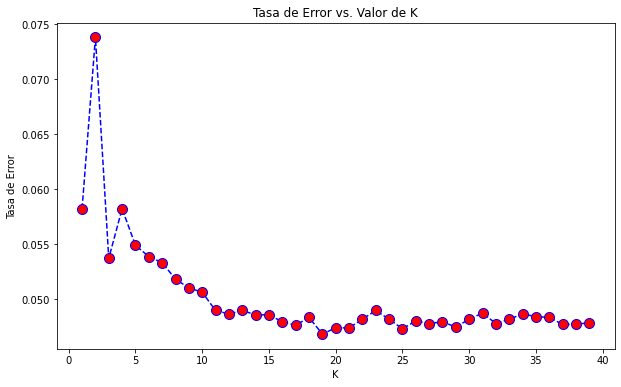

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Según los resultados, el volor de K más óptimo es K = 19

Reentrene con un nuevo valor K

**Reentrene su modelo con el mejor valor K (depende de usted esta decisión) y vuelva a hacer el informe de clasificación y la matriz de confusión.**

In [ ]:
# AHORA CON K=19
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=19


[[  224   254     0     0]
 [  133 10770    15    98]
 [    0    84    23     0]
 [    0     8     0  1036]]


              precision    recall  f1-score   support

           0       0.63      0.47      0.54       478
           1       0.97      0.98      0.97     11016
           2       0.61      0.21      0.32       107
           3       0.91      0.99      0.95      1044

    accuracy                           0.95     12645
   macro avg       0.78      0.66      0.69     12645
weighted avg       0.95      0.95      0.95     12645



## Buen trabajo!

## **Otro modelo: Árbol de Decisión**

In [ ]:
datosFinal2 = datosFinal[['Comisión', 'Precio', 'Plataforma_Facebook', 'Plataforma_Instagram', 'Plataforma_Website', 
                          'Plataforma_Youtube' , 'Tipo Orden_Compra', 'Tipo Orden_Devolucion', 'Item_Bottoms' , 'Item_Interior', 
                          'Item_Tops' , 'Medio_Influencer' , 'Medio_Propio', 'Tipo de Cliente_Habitual' , 'Tipo de Cliente_Nuevo',
                          'Frec_Devol_V']]

In [ ]:
datosFinal2

,Comisión,Precio,Plataforma_Facebook,Plataforma_Instagram,Plataforma_Website,Plataforma_Youtube,Tipo Orden_Compra,Tipo Orden_Devolucion,Item_Bottoms,Item_Interior,Item_Tops,Medio_Influencer,Medio_Propio,Tipo de Cliente_Habitual,Tipo de Cliente_Nuevo,Frec_Devol_V
0,0.0,40,0,0,1,0,1,0,1,0,0,0,1,1,0,1
1,0.0,50,0,0,1,0,1,0,0,0,1,0,1,1,0,1
2,0.0,36,0,0,1,0,1,0,1,0,0,0,1,1,0,1
3,0.0,40,0,0,1,0,1,0,0,1,0,0,1,1,0,1
4,0.0,50,0,0,1,0,1,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63216,0.3,46,0,0,0,1,1,0,0,0,1,1,0,1,0,0
63217,0.3,38,0,0,0,1,1,0,0,1,0,1,0,1,0,0
63218,0.3,40,0,0,0,1,1,0,0,0,1,1,0,1,0,0
63219,0.3,20,0,0,0,1,1,0,0,1,0,1,0,1,0,0


## **División en Conjunto de entrenamiento y de prueba**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = datosFinal2.drop('Frec_Devol_V',axis=1)
y = datosFinal2['Frec_Devol_V']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)

In [ ]:
# Comenzaremos simplemente entrenando un solo árbol de decisión.
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicción y Evaluación
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.53      0.56       478
           1       0.97      0.97      0.97     11016
           2       0.57      0.24      0.34       107
           3       0.91      1.00      0.95      1044

    accuracy                           0.95     12645
   macro avg       0.76      0.69      0.71     12645
weighted avg       0.95      0.95      0.95     12645



In [ ]:
print(confusion_matrix(y_test,predictions))

[[  254   224     0     0]
 [  181 10718    20    97]
 [    0    81    26     0]
 [    0     5     0  1039]]


## **Visualización de árbol**

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(datosFinal2.columns[1:])
features

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Precio',
 'Plataforma_Facebook',
 'Plataforma_Instagram',
 'Plataforma_Website',
 'Plataforma_Youtube',
 'Tipo Orden_Compra',
 'Tipo Orden_Devolucion',
 'Item_Bottoms',
 'Item_Interior',
 'Item_Tops',
 'Medio_Influencer',
 'Medio_Propio',
 'Tipo de Cliente_Habitual',
 'Tipo de Cliente_Nuevo',
 'Frec_Devol_V']

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [ ]:
plt.figure(figsize=(12,8),dpi=150)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

## **Bosques Aleatorios**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0,criterion='gini')
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[  246   232     0     0]
 [  177 10716    24    99]
 [    0    77    30     0]
 [    0     5     0  1039]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.58      0.51      0.55       478
           1       0.97      0.97      0.97     11016
           2       0.56      0.28      0.37       107
           3       0.91      1.00      0.95      1044

    accuracy                           0.95     12645
   macro avg       0.76      0.69      0.71     12645
weighted avg       0.95      0.95      0.95     12645



## ¡Buen trabajo!